In [7]:
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import TensorDataset, DataLoader
import gc
from tqdm.auto import tqdm
from matplotlib import pyplot as plt
from collections import namedtuple
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import mixture
import seaborn as sns
import numpy as np
from IPython.display import clear_output
device = torch.device("cuda:0")
sns.set_style("darkgrid")

In [8]:
datasets = {}


data_path_Xi = "data/Learning_data_part{i}.xlsx"

for i in range(1, 5, 1):
    File = pd.ExcelFile(data_path_Xi.format(i=i))
    X = File.parse('Sheet1')
    datasets.update({i: X})

In [9]:
datasets[3]

,t,TS_0_coord_0,TS_0_coord_1,TS_1_coord_0,TS_1_coord_1,TS_2_coord_0,TS_2_coord_1,TS_3_coord_0,TS_3_coord_1,TS_4_coord_0,...,TS_55_coord_0,TS_55_coord_1,TS_56_coord_0,TS_56_coord_1,TS_57_coord_0,TS_57_coord_1,TS_58_coord_0,TS_58_coord_1,TS_59_coord_0,TS_59_coord_1
0,0,777.590112,777.701138,781.304263,779.315015,783.695460,783.417890,777.710966,777.299867,781.054000,...,778.217714,779.480275,782.474352,774.009550,775.963810,776.852436,776.270425,783.432765,782.527989,778.524524
1,1,774.858709,774.411131,778.449965,777.254534,778.385848,777.444950,774.506583,775.827813,777.205838,...,775.436667,779.546814,780.900010,775.049291,778.157409,777.848820,776.235080,775.835909,775.198851,774.726813
2,2,777.618507,779.335325,779.432760,778.844367,773.967825,775.705821,776.717026,777.969782,779.403709,...,779.609414,776.613267,774.552153,782.850956,775.486792,775.366157,780.051221,777.007414,773.204876,782.166831
3,3,774.037866,773.797917,778.198245,778.130970,786.034488,785.687722,777.359150,776.984517,777.843754,...,775.567693,778.017274,775.181179,776.335030,772.461593,778.825087,776.591453,772.456699,774.126260,775.876213
4,4,773.728986,775.189005,770.943527,773.258509,776.757985,777.460021,774.971389,774.806654,771.371419,...,781.421023,771.639843,775.507663,778.936356,781.997190,775.043520,780.939170,769.569994,777.272451,780.681161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,780.484072,772.130606,782.605720,773.519371,779.486425,775.044859,778.016408,778.598586,774.849270,...,776.903199,775.204322,777.534318,777.930871,775.526913,775.770287,782.221058,773.945498,772.171661,769.978526
9996,9996,776.727231,777.740464,774.996259,777.482065,776.303514,778.480659,782.491378,781.692511,781.862823,...,773.523350,780.460097,775.882333,774.474206,776.191329,778.110485,770.082813,779.159693,776.224891,779.733758
9997,9997,778.570613,773.822224,771.373763,783.676028,774.483479,777.530487,777.994371,777.833982,777.581595,...,774.396995,769.606506,776.006823,778.425502,780.427057,780.802631,774.780934,779.327527,777.482623,775.447420
9998,9998,771.807754,782.628235,772.916479,780.844638,777.046161,778.922195,783.052808,780.499677,776.237253,...,776.734563,777.821006,781.310713,778.675284,780.465551,779.671996,781.347003,780.945407,776.313764,769.793525


In [26]:
datasets[4]

,t,TS_0_coord_0,TS_1_coord_0,TS_2_coord_0,TS_3_coord_0,TS_4_coord_0,TS_5_coord_0,TS_6_coord_0,TS_7_coord_0,TS_8_coord_0,...,TS_40_coord_0,TS_41_coord_0,TS_42_coord_0,TS_43_coord_0,TS_44_coord_0,TS_45_coord_0,TS_46_coord_0,TS_47_coord_0,TS_48_coord_0,TS_49_coord_0
0,0,777.679135,775.145167,779.134803,779.940318,778.026363,784.622101,777.189396,778.252745,779.079468,...,775.990131,776.544929,776.696670,775.502863,776.034399,779.124277,777.858835,772.493946,778.113188,781.139186
1,1,779.076261,776.546210,780.442133,780.675965,778.302130,784.288637,774.031459,777.958838,781.238591,...,775.690355,773.840369,775.158277,774.798338,774.527669,777.952551,782.555171,770.814566,777.173844,778.506020
2,2,780.463918,775.767970,778.328203,781.329404,777.655196,782.342678,775.171302,775.624617,779.597472,...,774.725358,774.788737,774.909912,776.028946,771.967426,774.937712,779.778453,773.937792,780.127145,774.693991
3,3,782.062161,774.817450,776.905897,779.395448,779.148350,782.584709,776.801345,776.009990,775.829146,...,781.270483,779.648506,776.739583,780.195431,774.619803,772.972471,783.537241,783.998422,776.423327,775.014931
4,4,781.943353,773.993488,775.856078,780.920122,780.324752,779.923217,777.294185,777.868083,775.931112,...,777.138367,772.004398,775.589954,780.118568,776.197269,774.892835,775.814396,780.589314,773.671797,774.153026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,780.581054,776.913516,775.485205,779.032343,774.314101,778.389016,773.969398,774.354056,770.632472,...,779.960999,776.074337,776.633718,775.573491,778.179804,767.931203,779.863447,775.439097,782.849531,778.622711
9996,9996,773.434447,776.026375,778.585924,775.001142,779.726733,776.295431,778.710655,781.840976,783.507821,...,778.351177,778.317111,778.900552,778.648416,773.934452,776.485556,775.393858,776.727005,771.973756,775.300026
9997,9997,781.461272,778.159755,773.667568,778.218570,775.151058,779.299580,776.736347,785.372351,770.508840,...,779.575579,778.060190,770.793968,774.717185,777.539988,779.765088,781.699775,777.018759,780.423606,771.525072
9998,9998,770.671198,775.089506,779.538293,778.376352,779.157803,773.743584,776.293337,771.189500,783.178285,...,773.604204,774.399717,780.612008,773.162370,775.986606,775.691275,775.750103,778.295713,783.163129,779.658544


In [64]:
np.correlate(datasets[3]['TS_0_coord_0'][0: 100], datasets[3]['TS_0_coord_1'][0: 100], mode='valid') / (np.std(datasets[3]['TS_0_coord_0'][0: 100]) * np.std(datasets[3]['TS_0_coord_1'][0: 100]))


array([6813413.43976578])

In [65]:
np.mean(datasets[3]['TS_0_coord_0'][0: 100])

776.8772794895855

In [67]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w


In [87]:
mean_ts_0 = moving_average(datasets[3]['TS_0_coord_0'], 10)

In [88]:
mean_ts_1 = moving_average(datasets[3]['TS_0_coord_1'], 10)

In [ ]:
scipy.stats.linregress()

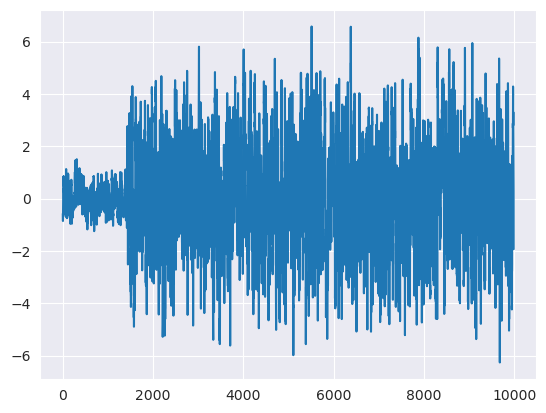

In [89]:
plt.plot(mean_ts_0 - mean_ts_1)

In [109]:
(y - w * x)

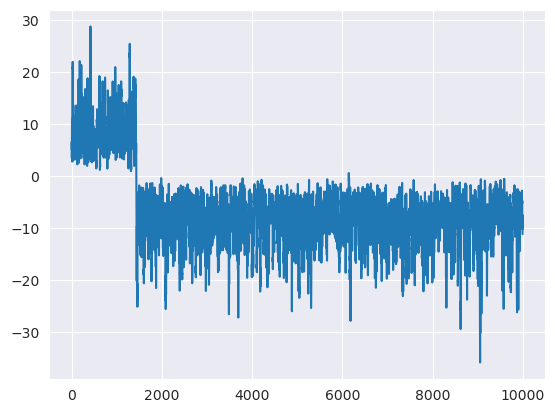

In [110]:
plt.plot(cov_array)

In [169]:
def moving_covariation(ar1, ar2, w):
    cov_array = []
    for t in range(0, ar1.shape[0] - w):
        cov_array.append(np.cov(ar1[t : t + w], ar2[t : t+ w])[0][1])
    return cov_array

In [138]:
datasets[2]

,t,TS_0_coord_0,TS_1_coord_0,TS_2_coord_0,TS_3_coord_0,TS_4_coord_0,TS_5_coord_0,TS_6_coord_0,TS_7_coord_0,TS_8_coord_0,...,TS_50_coord_0,TS_51_coord_0,TS_52_coord_0,TS_53_coord_0,TS_54_coord_0,TS_55_coord_0,TS_56_coord_0,TS_57_coord_0,TS_58_coord_0,TS_59_coord_0
0,0,-3.409188,-2.407987,4.336650,-0.373717,-8.233428,-1.870133,-0.167323,-1.511594,-4.261577,...,1.001072,0.999874,1.000519,0.999584,0.999710,1.000714,1.000141,0.998601,1.000978,0.999657
1,1,-1.301141,0.179917,3.420829,-1.431981,-0.943458,3.906801,1.804628,-2.485393,3.172589,...,1.001238,0.998442,1.002101,0.997588,1.000276,1.000275,0.999556,0.998472,1.001694,0.998848
2,2,-2.832516,0.128531,1.317262,4.305178,1.730649,2.562662,-6.652573,-0.298241,-1.593983,...,1.001069,0.997301,1.001905,0.996956,0.999332,1.000806,1.001417,0.999247,1.001115,0.998833
3,3,-3.812846,-3.403033,-2.549219,1.304434,-5.203170,4.553835,0.322669,-0.576871,-2.230504,...,1.001607,0.998654,1.002728,0.995967,0.998169,1.000737,1.002283,0.998968,0.999787,0.997835
4,4,1.223246,4.283249,4.191157,9.180627,-4.221019,3.582291,-0.239433,-3.032084,3.508173,...,1.002264,0.999228,1.002623,0.995078,0.998596,1.002500,1.002029,0.999980,0.998672,0.997843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,0.031638,-4.592589,-3.193913,0.660068,-1.192243,-1.274928,-0.024648,0.174750,3.212593,...,34.459891,50.436102,28.004989,0.372293,234.211323,0.296717,1.159068,1.175064,0.292493,0.055366
9996,9996,-2.782475,0.625177,1.451544,1.033471,-3.447398,-0.783747,-3.000197,-1.485645,-5.411178,...,34.498395,50.480619,28.012350,0.372369,234.776849,0.296914,1.158893,1.176821,0.292429,0.055316
9997,9997,4.180315,3.638524,-6.193414,1.236690,0.555979,-1.660820,-3.643112,-4.293121,-2.704499,...,34.548006,50.476281,28.023673,0.372462,234.542111,0.296769,1.158870,1.174981,0.292695,0.055293
9998,9998,-5.569192,5.439606,-1.867035,0.054482,-0.154464,-2.108039,0.686470,-3.213419,0.928657,...,34.593806,50.498641,28.015868,0.372990,234.939164,0.296831,1.159441,1.174014,0.292580,0.055248


In [ ]:
plt.plot(moving_covariation(datasets[2]['TS_20_coord_0']))

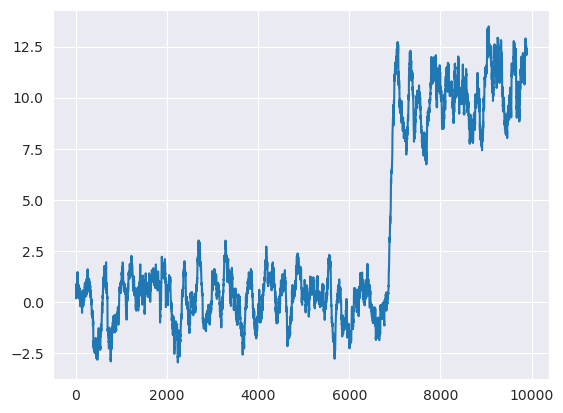

In [172]:
plt.plot(moving_covariation(datasets[3]['TS_20_coord_0'], datasets[3]['TS_20_coord_1'],100))

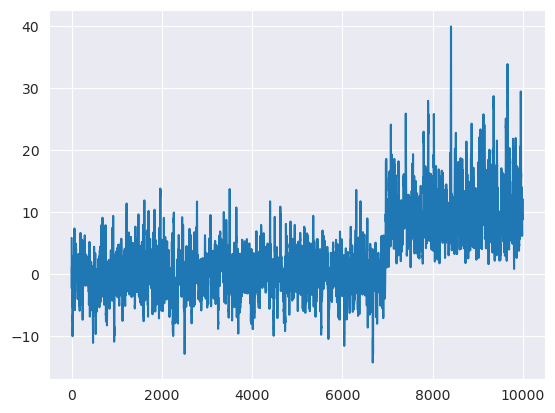

In [142]:
plt.plot(moving_covariation(datasets[3]['TS_20_coord_0'], datasets[3]['TS_20_coord_1'],10))

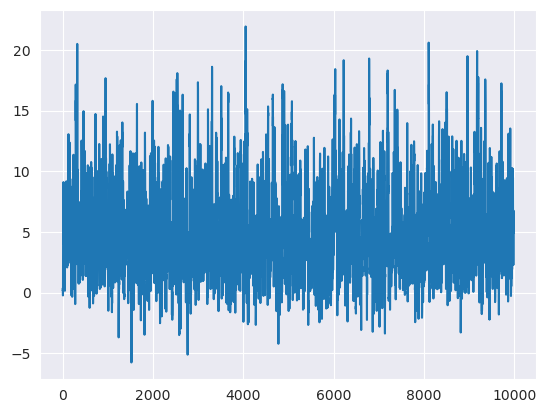

In [136]:
plt.plot(moving_covariation(datasets[3]['TS_43_coord_0'], datasets[3]['TS_43_coord_1'],10))

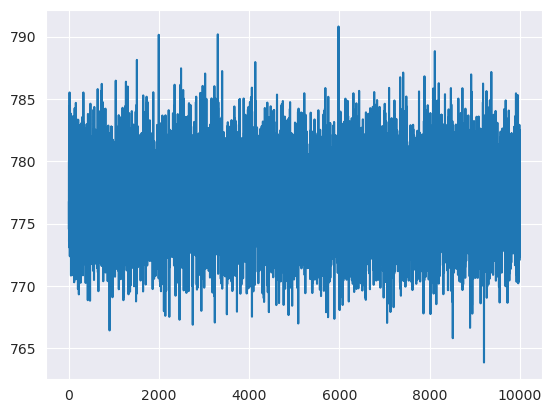

In [130]:
plt.plot(datasets[3]['TS_43_coord_0'])

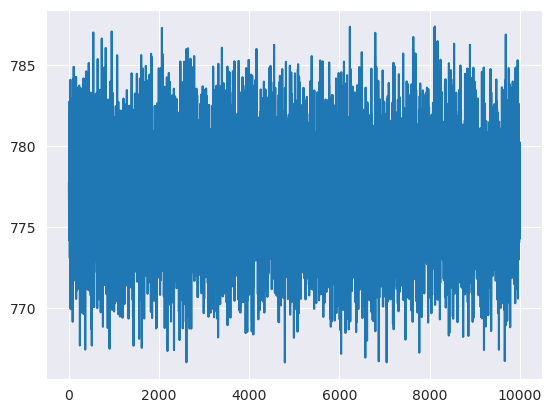

In [132]:
plt.plot(datasets[3]['TS_43_coord_1'])

In [95]:
np.cov(datasets[3]['TS_0_coord_0'][2100 : 2200], datasets[3]['TS_0_coord_1'][2100 : 2200])

array([[10.47433106, -9.2053647 ],
       [-9.2053647 ,  9.67929722]])

In [62]:
np.correlate(datasets[3]['TS_0_coord_0'][2000: 2100], datasets[3]['TS_0_coord_1'][2000: 2100], mode='valid')

array([60381561.83959533])

In [35]:
import scipy

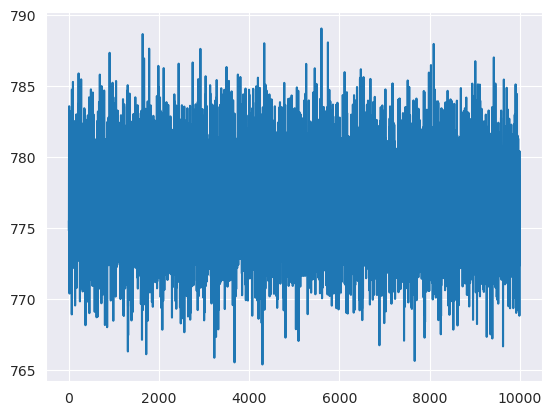

In [31]:
plt.plot(datasets[4]['t'], datasets[4]['TS__coord_0'])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


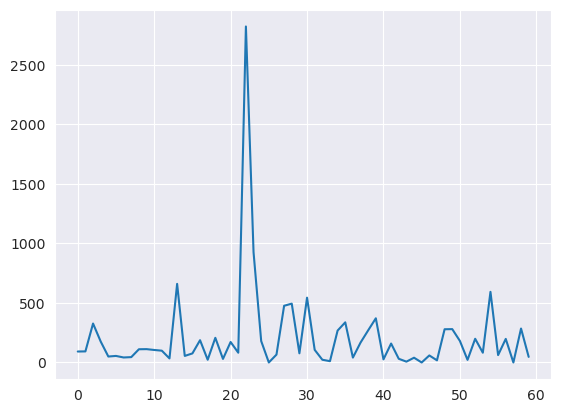

In [337]:
plt.plot(T)

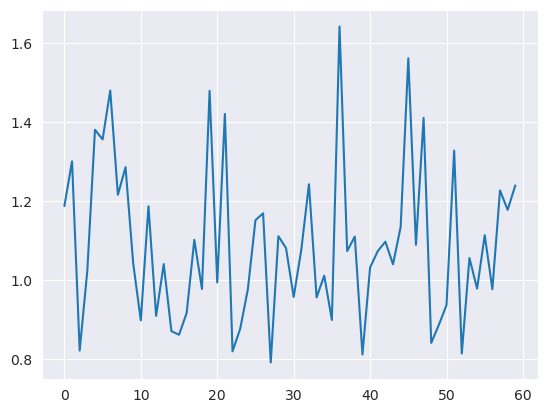

In [340]:
plt.plot(crit)

In [276]:
res = scipy.stats.linregress(datasets[3]['TS_20_coord_0'][:100],  datasets[3]['TS_20_coord_1'][:100])

In [283]:
std_arr = moving_std(datasets[3]['TS_1_coord_0'],  datasets[3]['TS_1_coord_1'], 5, 100)

In [273]:
crit  = linear_criteria(datasets[3]['TS_10_coord_0'],  datasets[3]['TS_10_coord_1'], 100, 100)

In [274]:
crit

0.946533580647818

In [235]:
np.argmax(std_arr > 3)

1338

In [236]:
std_arr[1338]

4.017109453120473

In [240]:
std_arr[1330:1340]

array([1.64354128, 1.36518785, 1.1367881 , 0.87260347, 1.50847942,
       1.08136165, 0.93833277, 1.87848382, 4.01710945, 3.9536034 ])

In [238]:
std_arr

array([0.57890732, 0.56235012, 0.70200639, ..., 5.23198416, 4.71385997,
       5.91107165])

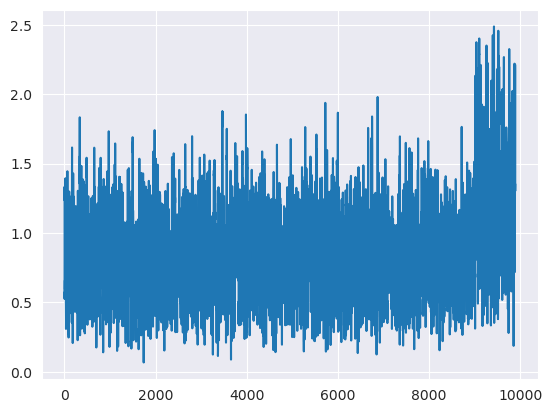

In [279]:
plt.plot(std_arr)

In [ ]:
y = w * x

In [167]:
res

LinregressResult(slope=0.8975422971984137, intercept=79.24629294984163, rvalue=0.9166056902547808, pvalue=8.35611837963318e-41, stderr=0.03954521427060825, intercept_stderr=30.737159084280112)

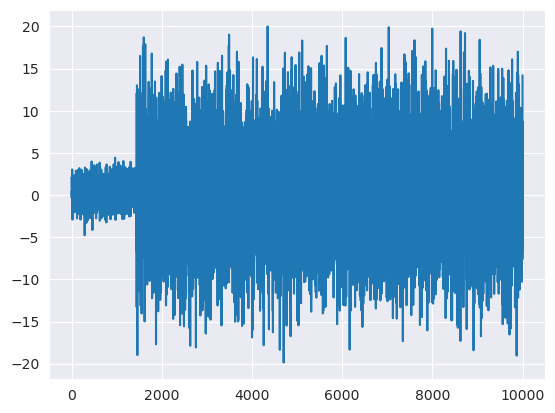

In [168]:
plt.plot(datasets[3]['t'], (datasets[3]['TS_0_coord_1'] - (datasets[3]['TS_0_coord_0'] * res.slope + res.intercept)))

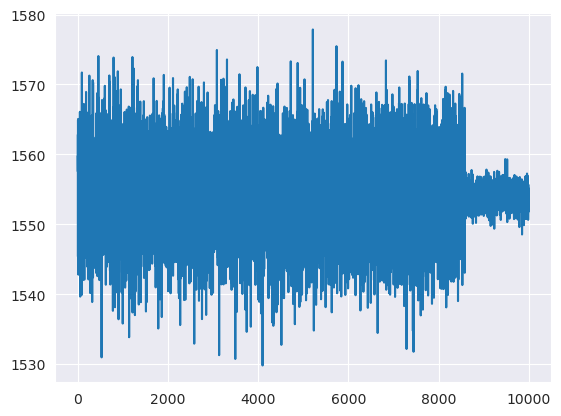

In [90]:
plt.plot(datasets[3]['t'], datasets[3]['TS_10_coord_0'] + datasets[3]['TS_10_coord_1'])

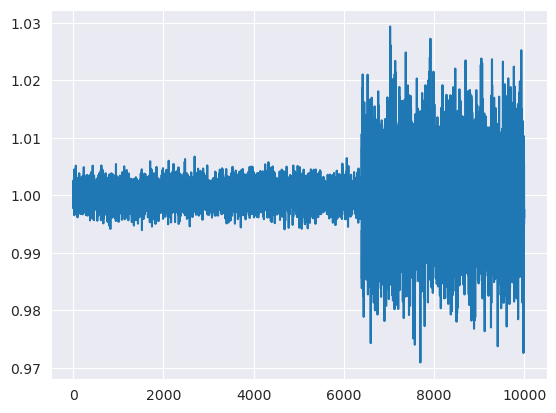

In [21]:
plt.plot(datasets[3]['t'], datasets[3]['TS_2_coord_0'] / datasets[3]['TS_2_coord_1'])

In [5]:
import statsmodels
from statsmodels.tsa.api import VAR


In [16]:
mse = sklearn.metrics.mean_squared_error
var = VAR()

TypeError: VAR.__init__() missing 1 required positional argument: 'endog'

In [25]:
np.stack((datasets[3]['TS_0_coord_0'].to_numpy(), datasets[3]['TS_0_coord_1'].to_numpy()), axis=-1)

array([[777.59011154, 777.70113803],
       [774.858709  , 774.41113142],
       [777.61850689, 779.33532536],
       ...,
       [778.57061318, 773.82222401],
       [771.80775399, 782.62823462],
       [769.74396051, 784.33149688]])

In [120]:
class VarLikeModel():
    def __init__(self, lag):
        self.lag = lag

    def fit(self, x, y):
        x = np.squeeze(x)

        time_series = np.stack((x, y), axis=-1)
        self.model = VAR(time_series)
        self.res = self.model.fit(self.lag)
        self.sample_size = x.shape[0]
    def predict(self, x):
        x = np.squeeze(x)
        return x
    def score(self, x, y):
        x = np.squeeze(x)
        x_real = np.stack((x, y), axis=-1)
        x_pred = self.res.forecast(x_real, x.shape[0])
        #print(x_real)
        #print(x_pred)
        #print(x_real - x_pred)
        return np.std(x_real - x_pred)

In [203]:
def moving_std_2d(model, loss, ar1, ar2, w, min_t):
    cov_array = []
    model.fit(ar1[:min_t].reshape(-1, 1),  ar2[:min_t])
    for t in range(min_t, ar1.shape[0] - w):
        #print(loss(model.predict(ar1[: min_t].reshape(-1, 1)), ar2[: min_t]))
        #print(loss(model.predict(ar1[t: t + w].reshape(-1, 1)), ar2[t: t + w]))
        cov_array.append(loss(model.predict(ar1[t: t + w].reshape(-1, 1)), ar2[t: t + w]) / loss(model.predict(ar1[: min_t].reshape(-1, 1)), ar2[: min_t]))
    return np.array(cov_array)
def linear_criteria_2d(model, loss, ar1, ar2, w, min_t):
    model.fit(ar1[:min_t].reshape(-1, 1), ar2[:min_t])
    return loss(model.predict(ar1[min_t: min_t + w].reshape(-1, 1)), ar2[min_t: min_t + w]) 
def check_model_2d(model, loss, dataset, n, dataset_name_0 = 'TS_{i}_coord_0', dataset_name_1 = 'TS_{i}_coord_1', min_t = 100):
    T = []
    crit = []
    prob = []
    for i in range(0, n):
        print(i)
        dataset_name_0 = 'TS_{i}_coord_0'
        dataset_name_1 = 'TS_{i}_coord_1'
        std_arr = moving_std_2d(model, loss, dataset[dataset_name_0.format(i=i)].to_numpy(),  dataset[dataset_name_1.format(i=i)].to_numpy(), 5, min_t)
        crit_k  = linear_criteria_2d(model, loss, dataset[dataset_name_0.format(i=i)].to_numpy(),  dataset[dataset_name_1.format(i=i)].to_numpy(), 100, min_t)
        T_k = np.argmax(std_arr > 3)
        T.append(T_k)
        crit.append(crit_k)
        prob.append(std_arr[T_k])
    return np.array(T), np.array(crit), np.array(prob)

In [187]:
var = VarLikeModel(3)

0


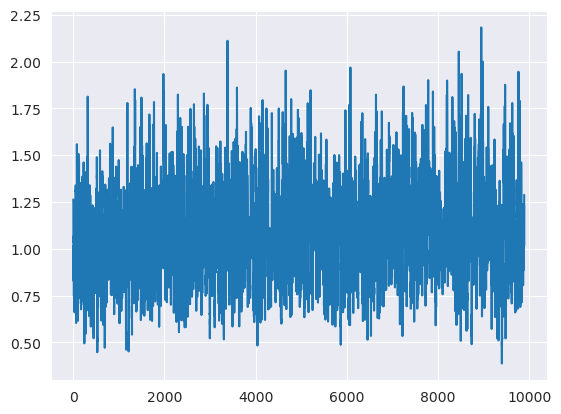

1


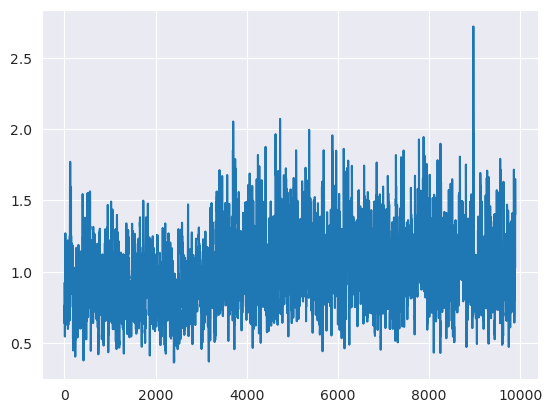

2


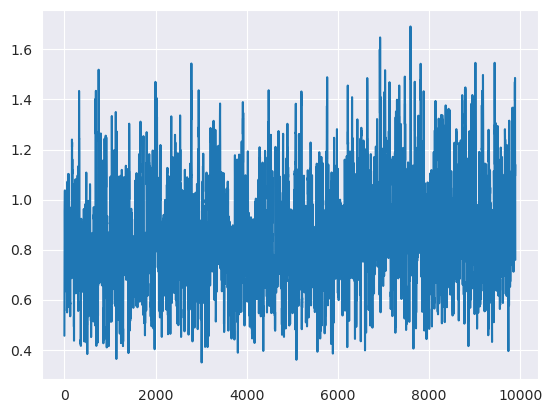

3


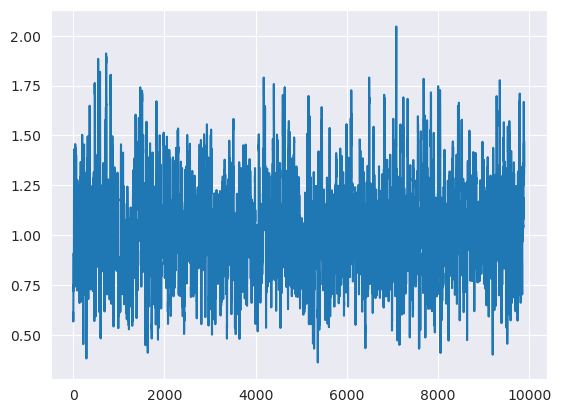

4


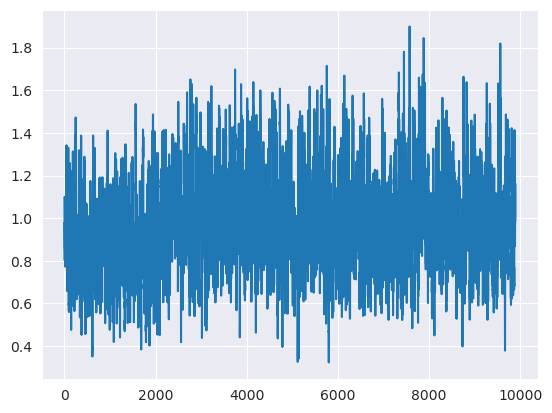

5


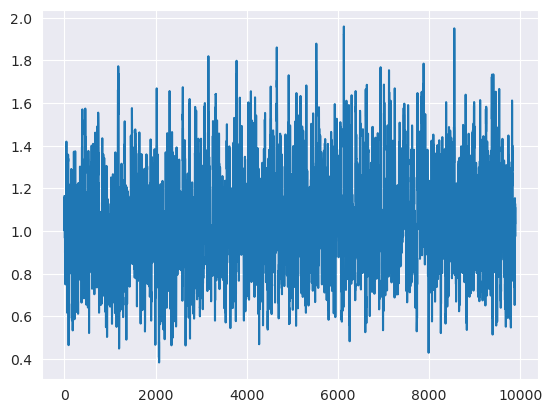

In [188]:
T_var, crit_var, prob_var = check_model(var, var.score, datasets[3], 6, dataset_name_0 = 'TS_{i}_coord_0', dataset_name_1 = 'TS_{i}_coord_1')

In [194]:
T_var

array([0, 0, 0, 0, 0, 0])

In [195]:
crit_var

array([3.7745112 , 2.11198459, 3.49905887, 3.26044852, 2.35929378,
       2.91381699])

In [177]:
prob_var

array([1.2640804 , 0.92066467, 0.45578526, 0.61334043, 1.09825707,
       1.16440521])

In [234]:
linear = sklearn.linear_model.LinearRegression()
mse = sklearn.metrics.mean_squared_error
T, crit, prob = check_model_2d(linear, mse, datasets[3], 60, dataset_name_0 = 'TS_{i}_coord_0', dataset_name_1 = 'TS_{i}_coord_1')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


array([ 280,  230, 2470,  735,  147,  175, 1980, 1216,  332, 1406, 3696,
       2232, 1262, 2211,  264, 6064,  388, 3760, 1111, 3054,  720,  182,
        100,  100, 1265,  396, 3076, 3854,  591,  481, 5579,  207,  254,
       1596,  616, 5382,  141,  473, 9715,  480,  892,  626,  126, 1813,
       2058,  454, 3127,  205,  100,  825, 1203,  121, 3967, 2866, 4362,
       1931,  384,  100, 3066,  435])

In [ ]:
T + 100

In [201]:
crit

array([ 2.39144779,  1.74222224,  1.43483326,  1.72402192,  2.58903853,
        1.24413854,  0.8772321 ,  2.5573576 ,  1.1696377 ,  2.48503769,
        1.66690731,  2.0783139 ,  1.60170963,  0.99838354,  0.61985269,
       12.72724188,  8.75118576,  8.39332818, 14.0497467 , 14.63228052,
        7.14457459,  5.4950055 ,  3.37957817, 10.54568129,  8.61404913,
       12.66147169, 10.64952831,  6.37034045, 14.12071049, 10.99337744,
       11.81499065, 15.13031517,  6.48893862,  6.01123787,  6.53776733,
       10.22722598,  2.52677145,  8.7253489 ,  7.04948857,  4.83775312,
        5.82823938,  7.98236965,  8.08553942,  3.63531126,  4.7331339 ,
        9.5009426 ,  6.56309895,  4.39920171,  3.97927651,  4.4818912 ,
        4.35249925,  5.25519647, 17.72239989,  7.51509412, 11.63408582,
       11.46555654, 16.15224057, 13.14189888,  8.30676197,  8.00179795])

In [202]:
prob

array([3.5910463 , 3.09433211, 3.13161662, 3.58291644, 3.5609693 ,
       3.06573867, 3.04356328, 6.33860831, 3.14616358, 5.68252726,
       3.15670544, 4.33994054, 6.55854002, 3.05205812, 3.06841878,
       3.04550576, 3.00303308, 3.39800841, 3.29523033, 3.42650735,
       3.20230798, 3.51908028, 0.85364327, 0.20448735, 3.16636291,
       3.17951101, 3.02649169, 3.08250994, 3.01639639, 3.28844713,
       3.28933872, 3.07293638, 3.05966442, 3.84412377, 3.17742246,
       3.08778239, 3.70801185, 3.21864292, 3.5003076 , 3.04143379,
       3.07398754, 3.0750599 , 3.1489047 , 3.31552615, 3.0991018 ,
       3.28489624, 3.1691987 , 3.12947236, 0.27590764, 3.09222516,
       3.21804454, 3.12911963, 3.08872032, 3.02573264, 3.23284281,
       3.12903238, 3.00709674, 3.12003831, 3.30983379, 3.04165064])

In [227]:
share = np.exp(prob**2) 

In [228]:
share

array([3.98560070e+05, 1.43986709e+04, 1.81608359e+04, 3.75979624e+05,
       3.21419492e+05, 1.20733229e+04, 1.05436331e+04, 2.81231694e+17,
       1.98974182e+04, 1.05646111e+14, 2.12643924e+04, 1.51346715e+08,
       4.79663913e+18, 1.11039791e+04, 1.22734517e+04, 1.06690820e+04,
       8.25197385e+03, 1.03410437e+05, 5.19762891e+04, 1.25611940e+05,
       2.84179533e+04, 2.38930036e+05, 2.07239893e+00, 1.04270164e+00,
       2.26033652e+04, 2.45702160e+04, 9.50574804e+03, 1.33847000e+04,
       8.94318620e+03, 4.97061774e+04, 4.99985463e+04, 1.26187360e+04,
       1.16323628e+04, 2.61634156e+06, 2.42461582e+04, 1.38272990e+04,
       9.35982302e+05, 3.15605189e+04, 2.09431770e+05, 1.04078905e+04,
       1.27005352e+04, 1.27845591e+04, 2.02437383e+04, 5.94394653e+04,
       1.48303642e+04, 4.85594127e+04, 2.30131351e+04, 1.79186481e+04,
       1.07909748e+00, 1.42122055e+04, 3.14391953e+04, 1.78791344e+04,
       1.39076347e+04, 9.46217953e+03, 3.45883659e+04, 1.78693748e+04,
      

In [231]:
share = share / np.linalg.norm(prob, ord=1)

In [232]:
share

array([8.29490769e-14, 2.99667867e-15, 3.77966758e-15, 7.82495916e-14,
       6.68944336e-14, 2.51272283e-15, 2.19436089e-15, 5.85304730e-02,
       4.14108837e-15, 2.19872687e-05, 4.42558562e-15, 3.14985651e-11,
       9.98285622e-01, 2.31098116e-15, 2.55437401e-15, 2.22046956e-15,
       1.71741643e-15, 2.15219761e-14, 1.08174037e-14, 2.61425949e-14,
       5.91439829e-15, 4.97265717e-14, 4.31311591e-19, 2.17009041e-19,
       4.70425519e-15, 5.11359990e-15, 1.97835429e-15, 2.78564912e-15,
       1.86127285e-15, 1.03449438e-14, 1.04057922e-14, 2.62623524e-15,
       2.42094937e-15, 5.44517961e-13, 5.04615638e-15, 2.87776367e-15,
       1.94798410e-13, 6.56843498e-15, 4.35873368e-14, 2.16610989e-15,
       2.64325946e-15, 2.66074666e-15, 4.21316516e-15, 1.23706541e-14,
       3.08652350e-15, 1.01062770e-14, 4.78953727e-15, 3.72926299e-15,
       2.24583812e-19, 2.95787113e-15, 6.54318490e-15, 3.72103932e-15,
       2.89448327e-15, 1.96928673e-15, 7.19859624e-15, 3.71900813e-15,
      

## Model 4

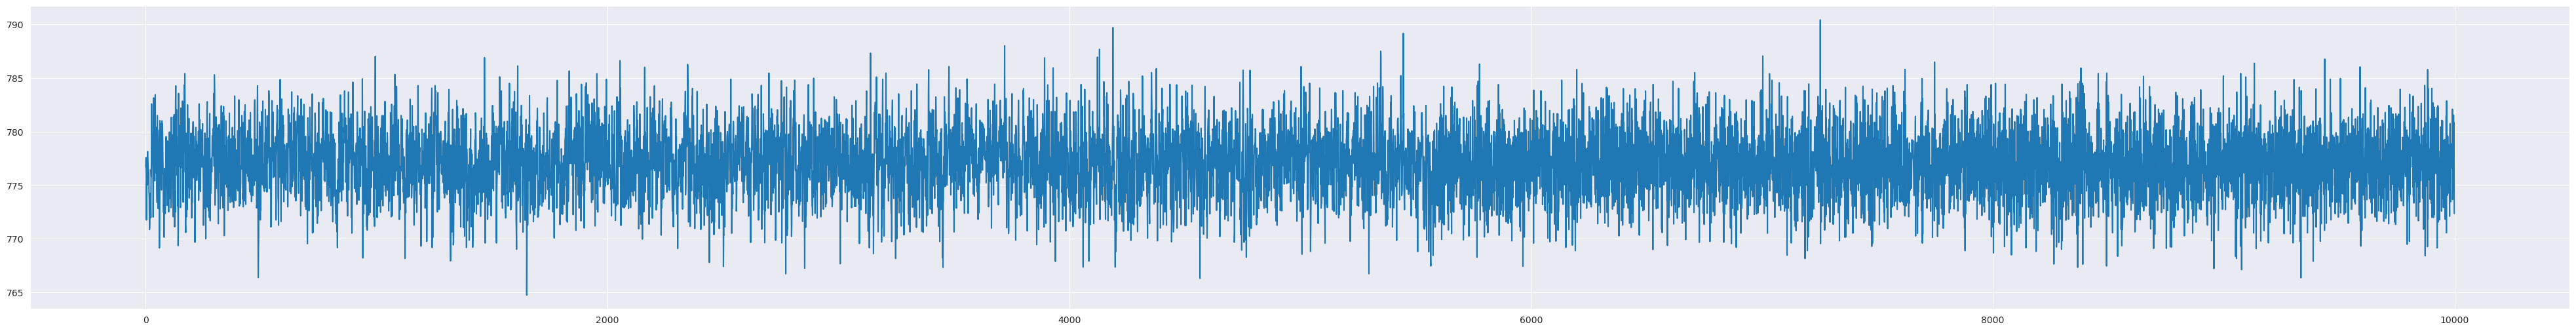

In [166]:
plt.figure(figsize=(50,6))
plt.plot(datasets[4]['TS_35_coord_0'])

In [167]:
from statsmodels.tsa.api import ARIMA

In [215]:
arima  = ARIMA(datasets[4]['TS_1_coord_0'][0:200],  order = (13, 1, 14))

In [216]:
res = arima.fit()

/home/sasha/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/sasha/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


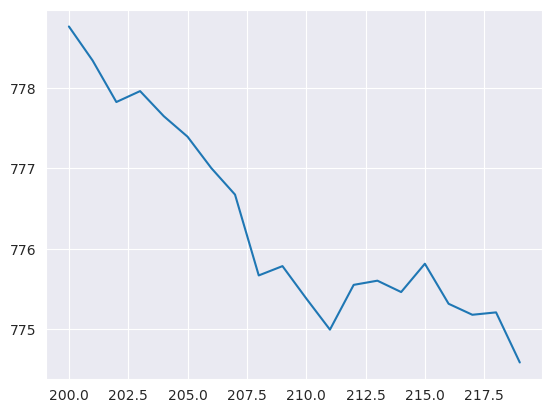

In [222]:
plt.plot(res.forecast(20))

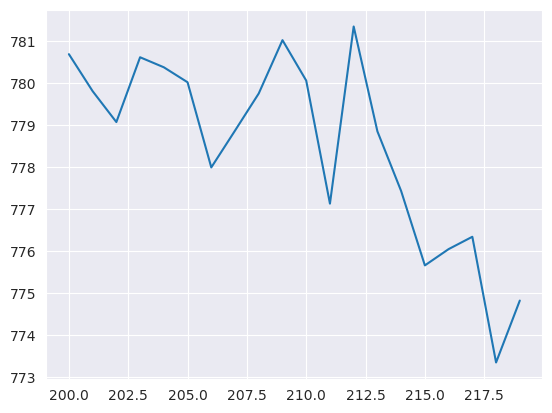

In [223]:
plt.plot(datasets[4]['TS_1_coord_0'][200: 220])

In [217]:
np.std(res.forecast(100) - datasets[4]['TS_35_coord_0'][200: 300])

3.0702539640115845

In [204]:
def moving_std(model, loss, X, w, min_t):
    cov_array = []
    model.fit(X[:min_t].reshape(-1, 1),  X[:min_t])
    for t in range(min_t, X.shape[0] - w):
        cov_array.append(loss(model.predict(X[t: t + w].reshape(-1, 1)), X[t: t + w]) / loss(model.predict(X[: min_t].reshape(-1, 1)), X[: min_t]))
    return np.array(cov_array)
def linear_criteria(model, loss, X, w, min_t):
    model.fit(X[:min_t])
    return loss(model.predict(X), X) 
def check_model(model, loss, dataset, n, dataset_name = 'TS_{i}_coord_{j}', min_t = 100, d = 2):
    T = []
    crit = []
    prob = []
    for i in range(0, n):
        print(i)
        X = np.array()
        for j in range(d):
            np.stack((X, dataset[dataset_name.format(i=i, j=j)].to_numpy()), axis = -1)
        std_arr = moving_std(model, loss, X, 5, min_t)
        crit_k  = linear_criteria(model, loss, X, 100, min_t)
        T_k = np.argmax(std_arr > 3)
        T.append(T_k)
        crit.append(crit_k)
        prob.append(std_arr[T_k])
    return np.array(T), np.array(crit), np.array(prob)

In [205]:
class ArimaLikeModel():
    def __init__(self, order):
        self.order = order

    def fit(self, x, y):
        x = np.squeeze(x)

        time_series = np.stack((x, y), axis=-1)
        self.model = ARIMA(time_series, self.order)
        self.res = self.model.fit()
        self.sample_size = x.shape[0]
    def predict(self, x):
        x = np.squeeze(x)
        return x
    def score(self, x, y):
        x = np.squeeze(x)
        x_real = np.stack((x, y), axis=-1)
        x_pred = self.res.forecast(x_real, x.shape[0])
        #print(x_real)
        #print(x_pred)
        #print(x_real - x_pred)
        return np.std(x_real - x_pred)

In [224]:
arima = ArimaLikeModel((13, 1, 14))

In [ ]:
arima.fit()